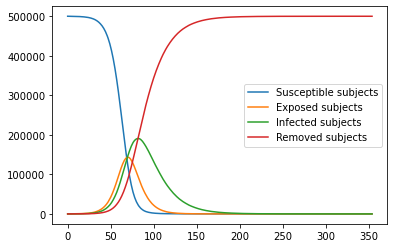

[[499900      0    100      0]
 [499860     37     96      7]
 [499829     66     92     13]
 [499795     92     95     18]
 [499750    130     97     23]
 [499706    160    104     30]
 [499677    182    109     32]
 [499627    218    119     36]
 [499580    244    130     46]
 [499514    280    155     51]
 [499444    320    179     57]
 [499360    368    205     67]
 [499276    418    229     77]
 [499174    478    261     87]
 [499075    537    289     99]
 [498960    586    337    117]
 [498834    656    376    134]
 [498669    759    419    153]
 [498470    882    481    167]
 [498267   1000    538    195]
 [498019   1137    624    220]
 [497761   1258    720    261]
 [497469   1430    797    304]
 [497131   1624    902    343]
 [496776   1822   1010    392]
 [496344   2052   1157    447]
 [495833   2338   1330    499]
 [495272   2616   1547    565]
 [494619   2966   1772    643]
 [493897   3377   1985    741]
 [493065   3854   2224    857]
 [492139   4355   2550    956]
 [491062

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from time import process_time

np.random.seed(1234)
np.set_printoptions(threshold=np.inf)


class Simulation:
    def __init__(self, beta, a, gamma, n, s=0, e=0, i=0):
        """
        Specify initial parameters to initialize simulation.
        """
        self.beta = beta
        self.a = a
        self.gamma = gamma
        self.n = n
        self.s = s
        self.e = e
        self.i = i
        self.r = n - s - e - i
        self.total_out_of_s_coefficient = 0
        self.total_into_i_coefficient = 0
        self.total_into_r_coefficient = 0
        self.history = [[self.s, self.e, self.i, self.r]]
        self.total_time = 0
        self.time_steps = [0]
        self.unit_time_data = [[self.s, self.e, self.i, self.r]]
        self.unit_time_step = 1

    def update_coefficients(self):
        """
        This updates the coefficients/parameters used for each of the three Poisson
        processes.
        """
        self.total_out_of_s_coefficient = self.beta * self.i * self.s / self.n
        self.total_into_i_coefficient = self.a * self.e
        self.total_into_r_coefficient = self.gamma * self.i

    def update_seir(self, argmin):
        """
        Updates SEIR categories based on positive numbers produced from sampling the
        Poisson distributions.
        """
        if argmin == 0:
            self.s = self.s - 1
            self.e = self.e + 1
        elif argmin == 1:
            self.e = self.e - 1
            self.i = self.i + 1
        else:
            self.i = self.i - 1
            self.r = self.r + 1

    def update_history(self):
        """
        self.history is a numpy array that stores the values of S, E, I, and R at
        each time step in a simulation. It is updated at every time step.
        """
        self.history.append([self.s, self.e, self.i, self.r])

    def time_step(self):
        if self.e == 0 and self.i == 0:
            self.history.append([self.s, self.e, self.i, self.r])
            self.total_time += 1
            self.time_steps.append(self.total_time)
            return
        self.update_coefficients()
        """
        This function calculates a random time step for each of the three Poisson processes,
        selects the minimum one, and then updates the categories accordingly. 
        """
        if self.total_out_of_s_coefficient == 0:
            time_for_out_of_s = np.inf
        else:
            time_for_out_of_s = -1 * math.log(random.uniform(0, 1)) / self.total_out_of_s_coefficient

        if self.total_into_i_coefficient == 0:
            time_for_into_i = np.inf
        else:
            time_for_into_i = -1 * math.log(random.uniform(0, 1)) / self.total_into_i_coefficient

        if self.total_into_r_coefficient == 0:
            time_for_into_r = np.inf
        else:
            time_for_into_r = -1 * math.log(random.uniform(0, 1)) / self.total_into_r_coefficient

        time_array = np.asarray([time_for_out_of_s, time_for_into_i, time_for_into_r])
        self.total_time += min(time_array)
        self.time_steps.append(self.total_time)
        argmin = np.argmin(time_array)

        while self.unit_time_step <= self.total_time:
            self.unit_time_data.append([self.s, self.e, self.i, self.r])
            self.unit_time_step += 1

        self.update_seir(argmin)
        self.update_history()

    def simulate(self, total_time):
        """
        Simulates SEIR model given specified number of times steps.
        """
        while self.time_steps[-1] < total_time:
            self.time_step()

        self.unit_time_data.append([self.s, self.e, self.i, self.r])

    def simulate_till_end(self):
        """
        Simulates SEIR model until E and I categories are zero
        """
        while self.e != 0 or self.i != 0:
            self.time_step()

        self.unit_time_data.append([self.s, self.e, self.i, self.r])

    def graph(self):
        """
        Graphs the data stored in self.history.
        """
        time_range = range(self.unit_time_step + 1)

        s_unit_data = np.asarray(self.unit_time_data)[:, 0]
        e_unit_data = np.asarray(self.unit_time_data)[:, 1]
        i_unit_data = np.asarray(self.unit_time_data)[:, 2]
        r_unit_data = np.asarray(self.unit_time_data)[:, 3]

        plt.plot(time_range, s_unit_data, label='Susceptible subjects')
        plt.plot(time_range, e_unit_data, label='Exposed subjects')
        plt.plot(time_range, i_unit_data, label='Infected subjects')
        plt.plot(time_range, r_unit_data, label='Removed subjects')
        plt.legend()
        plt.show()


def graph_beta(a, gamma, n, s, i):
    """
    Shows how changes in beta parameter affect total number of infected cases.
    """
    beta = 0
    results = []
    for beta in np.linspace(0, .25, 200):
        simul = Simulation(beta, a, gamma, n, s=s, i=i)
        simul.simulate_till_end()
        final = simul.history[-1][3]
        results.append(final)
    plt.plot(np.linspace(0, .25, 200), results)
    plt.xlabel('beta value')
    plt.ylabel('Cumulative number of infected at end of simulation')
    plt.show()


if __name__ == '__main__':
    "setting variables"
    beta = .4  # number of contacts per person per time step
    a = .1  # parameter controlling latency between exposure and infection
    gamma = .05  # parameter specifying probability of removal
    n = 500000  # total population
    i = 100  # initial number of infected subjects
    s = n - i  # susceptible subjects

    sim = Simulation(beta, a, gamma, n, s=s, i=i)
    sim.simulate_till_end()
    sim.graph()
   
    print(np.asarray(sim.unit_time_data))
    


In [16]:
# Wrangling the data from simulation

print(np.asarray(sim.unit_time_data).shape)

data = torch.Tensor(np.asarray(sim.unit_time_data))
    
inputs = data.view(batch_size, SEQ_LEN, input_size)

print(inputs.shape)
print(inputs)

(355, 4)
torch.Size([355, 4, 1])
tensor([[[4.9990e+05],
         [0.0000e+00],
         [1.0000e+02],
         [0.0000e+00]],

        [[4.9986e+05],
         [3.7000e+01],
         [9.6000e+01],
         [7.0000e+00]],

        [[4.9983e+05],
         [6.6000e+01],
         [9.2000e+01],
         [1.3000e+01]],

        ...,

        [[1.5000e+02],
         [0.0000e+00],
         [1.0000e+00],
         [4.9985e+05]],

        [[1.5000e+02],
         [0.0000e+00],
         [1.0000e+00],
         [4.9985e+05]],

        [[1.5000e+02],
         [0.0000e+00],
         [0.0000e+00],
         [4.9985e+05]]])


In [19]:
import torch
from torch import nn

torch.manual_seed(1234)

# Parameterse for RNN
num_layers = 1
input_size = 1 # 1 dimension
hidden_size = 8
output_size = 4
SEQ_LEN = 4 #each input has 4 numbers
batch_size = 355

# inputs has size (batch_size, seq_len, input_size)

rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

output, h_n = rnn(inputs)

print(output)

tensor([[[-1.0000, -1.0000, -1.0000,  ...,  1.0000, -1.0000, -1.0000],
         [-0.5839,  0.3784, -0.7330,  ..., -0.6493,  0.8567, -0.2070],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000, -1.0000, -0.9947],
         [-0.5834,  0.3788, -0.7333,  ..., -0.6496,  0.8563, -0.2074]],

        [[-1.0000, -1.0000, -1.0000,  ...,  1.0000, -1.0000, -1.0000],
         [-1.0000, -0.9742, -1.0000,  ...,  0.9997, -1.0000, -0.7793],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000, -1.0000, -0.9835],
         [-0.9950, -0.0856, -0.9719,  ...,  0.2144, -0.7362, -0.3532]],

        [[-1.0000, -1.0000, -1.0000,  ...,  1.0000, -1.0000, -1.0000],
         [-1.0000, -0.9995, -1.0000,  ...,  1.0000, -1.0000, -0.9350],
         [-1.0000, -1.0000, -1.0000,  ...,  1.0000, -1.0000, -0.9796],
         [-0.9999, -0.4634, -0.9963,  ...,  0.7890, -0.9933, -0.4658]],

        ...,

        [[-1.0000, -1.0000, -1.0000,  ...,  1.0000, -1.0000, -0.9993],
         [-0.5838,  0.3785, -0.7330,  ..., -0.6494,  0.85

In [21]:
# LSTM 

lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

output, (h_n, c_n) = lstm(inputs)

print(output)

tensor([[[-0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-2.0997e-01, -1.9048e-03,  2.6593e-02,  ...,  6.4245e-02,
           2.3628e-01, -7.2242e-02],
         [-2.5691e-02, -3.8946e-10,  8.8870e-08,  ...,  1.6751e-01,
           7.2547e-16, -4.0990e-14],
         [-2.1716e-01, -5.4700e-03,  2.1115e-02,  ...,  9.6266e-02,
           2.6855e-01, -6.5004e-02]],

        [[-0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-1.4460e-01, -2.4618e-08, -1.4289e-04,  ...,  2.5056e-02,
           2.1497e-06,  6.4366e-06],
         [-2.7862e-02, -1.8957e-12, -6.6862e-10,  ...,  2.5133e-02,
           3.2064e-15,  9.2485e-14],
         [-2.2342e-01, -1.6671e-02, -3.1848e-02,  ...,  1.9295e-01,
           5.5400e-02, -6.7982e-03]],

        [[-0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-6.8622e-02, -4.1653e-14, -1.9551e-07,  .